Importing the Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Dataset

In [ ]:
data = pd.read_csv('/content/INFY Historical Data (1).csv')

First 5 Rows

In [ ]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,19-12-2024,"1,935.75","1,940.90","1,959.15","1,921.45",3.13M,-2.19%
1,18-12-2024,"1,979.15","1,966.80","1,984.95","1,961.60",3.06M,0.13%
2,17-12-2024,"1,976.60","1,968.00","1,982.00","1,958.00",5.81M,-0.17%
3,16-12-2024,"1,980.05","1,995.45","1,999.60","1,977.60",3.12M,-0.98%
4,13-12-2024,"1,999.70","1,969.75","2,006.45","1,953.80",5.36M,0.64%


Last 5 Rows

In [ ]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
7204,26-12-1995,0.78,0.78,0.78,0.78,102.40K,-1.27%
7205,22-12-1995,0.79,0.77,0.79,0.77,102.40K,2.60%
7206,21-12-1995,0.77,0.77,0.77,0.77,153.60K,0.00%
7207,20-12-1995,0.77,0.77,0.77,0.77,204.80K,1.32%
7208,19-12-1995,0.76,0.76,0.76,0.76,256.00K,-1.30%


Info about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7209 entries, 0 to 7208
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7209 non-null   object
 1   Price     7209 non-null   object
 2   Open      7209 non-null   object
 3   High      7209 non-null   object
 4   Low       7209 non-null   object
 5   Vol.      7208 non-null   object
 6   Change %  7209 non-null   object
dtypes: object(7)
memory usage: 394.4+ KB


Describe function for data

In [ ]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,7209,7209,7209,7209,7209,7208,7209
unique,7209,6500,5431,5909,6034,2857,1172
top,19-12-2024,1.34,1.36,1.34,1.35,307.20K,0.00%
freq,1,18,16,21,16,22,129


Rows and Columns

In [ ]:
data.shape

(7209, 7)

DATA CLEANING

Convert 'Date' to datetime

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

Remove commas and convert price-related columns to float

In [ ]:
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

Clean 'Vol.' column

In [ ]:
def parse_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1_000_000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1_000
    return vol
data['Vol.'] = data['Vol.'].apply(parse_volume)

Clean 'Change %' column (Remove % symbol)

In [ ]:
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

Check for Null values


In [ ]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,1
Change %,0


Handling null value in 'Vol.'

In [ ]:
data['Vol.'] = data['Vol.'].fillna(data['Vol.'].median())

Monthly Aggregation

Create a Month column for grouping.
Aggregate columns to compute monthly averages and totals

In [ ]:
if isinstance(data['Date'].dtype, pd.PeriodDtype):
    data['Date'] = data['Date'].dt.to_timestamp()
data['Month'] = data['Date'].dt.to_period('M')
monthly_data = data.groupby('Month').agg({
    'Price': 'mean',
    'High': 'mean',
    'Low': 'mean',
    'Change %': 'mean',
    'Vol.': 'sum'
}).reset_index()
monthly_data['Month'] = monthly_data['Month'].dt.to_timestamp()
monthly_data.rename(columns={'Month': 'Date'}, inplace=True)
print(monthly_data.head())

        Date     Price      High       Low  Change %        Vol.
0 1995-12-01  0.778750  0.780000  0.772500  0.328750   1894400.0
1 1996-01-01  0.774545  0.776818  0.767727 -0.053182   9161200.0
2 1996-02-01  0.917000  0.924500  0.896500  0.816000  20266800.0
3 1996-03-01  0.929474  0.934737  0.920526  0.350526   8193200.0
4 1996-04-01  1.138000  1.154500  1.120500  1.185000  37284400.0


Check for Duplicate values

In [ ]:
data.duplicated().sum()

0

EDA


Highest Price: 1944.5 in December 2024


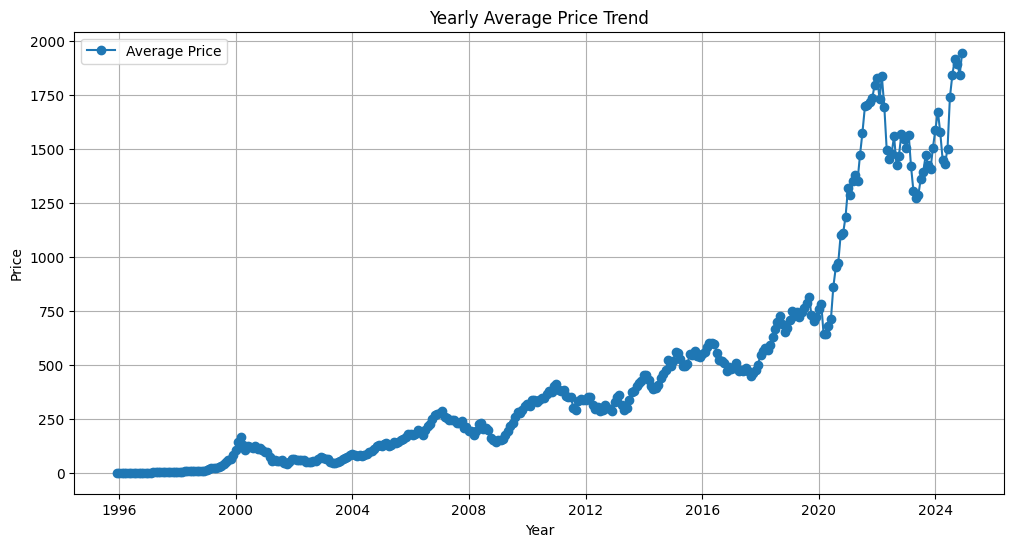

In [ ]:
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
max_price_row = monthly_data.loc[monthly_data['Price'].idxmax()]
max_price = max_price_row['Price']
max_date = max_price_row['Date']
max_year = max_date.year
max_month = max_date.month_name()
print(f"Highest Price: {max_price} in {max_month} {max_year}")
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Price'], label='Average Price', marker='o')
plt.title('Yearly Average Price Trend')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Total Trading Volume Analysis

Highest Trading Volume: 1627520000 in April 2003
Lowest Trading Volume: 1894400 in December 1995


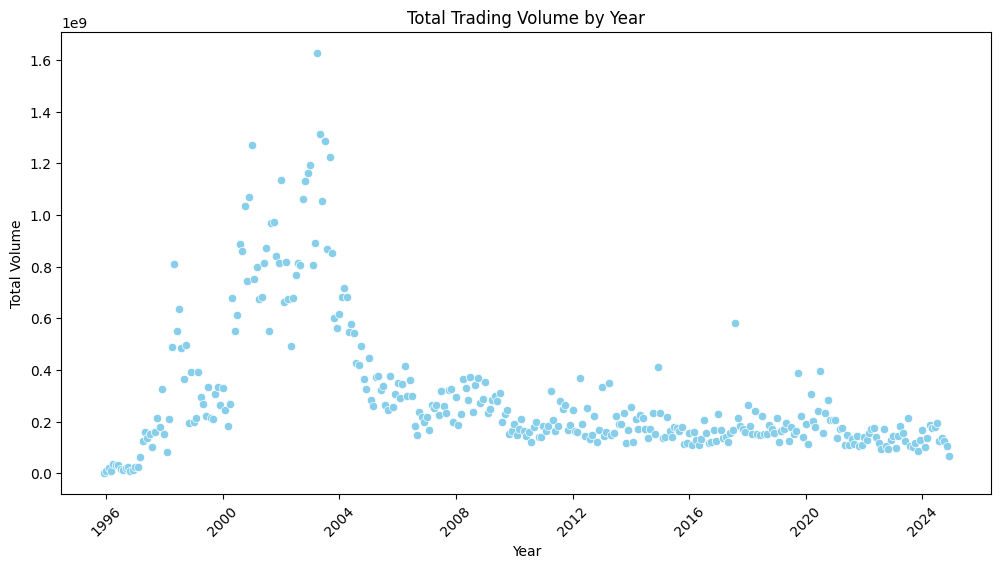

In [ ]:
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])
max_vol_row = monthly_data.loc[monthly_data['Vol.'].idxmax()]
min_vol_row = monthly_data.loc[monthly_data['Vol.'].idxmin()]
max_vol = int(max_vol_row['Vol.'])
max_vol_date = max_vol_row['Date']
max_vol_year = max_vol_date.year
max_vol_month = max_vol_date.month_name()
min_vol = int(min_vol_row['Vol.'])
min_vol_date = min_vol_row['Date']
min_vol_year = min_vol_date.year
min_vol_month = min_vol_date.month_name()
print(f"Highest Trading Volume: {max_vol} in {max_vol_month} {max_vol_year}")
print(f"Lowest Trading Volume: {min_vol} in {min_vol_month} {min_vol_year}")
plt.figure(figsize=(12, 6))
sns.scatterplot(x=monthly_data['Date'], y=monthly_data['Vol.'], color='skyblue')
plt.title('Total Trading Volume by Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()


Correlation Heatmap

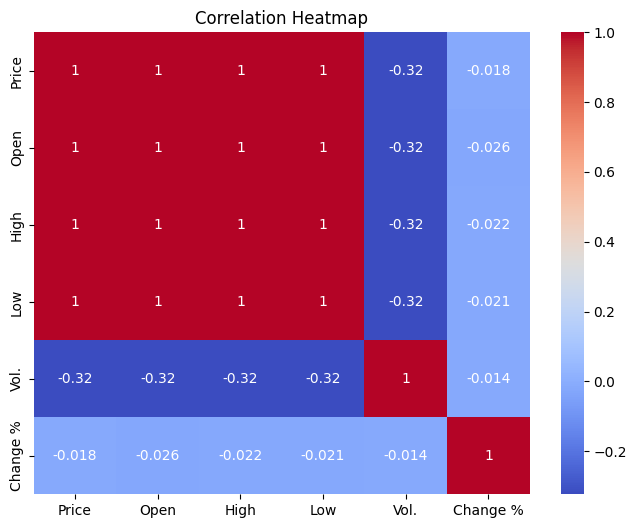

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Price vs Volume Scatterplot

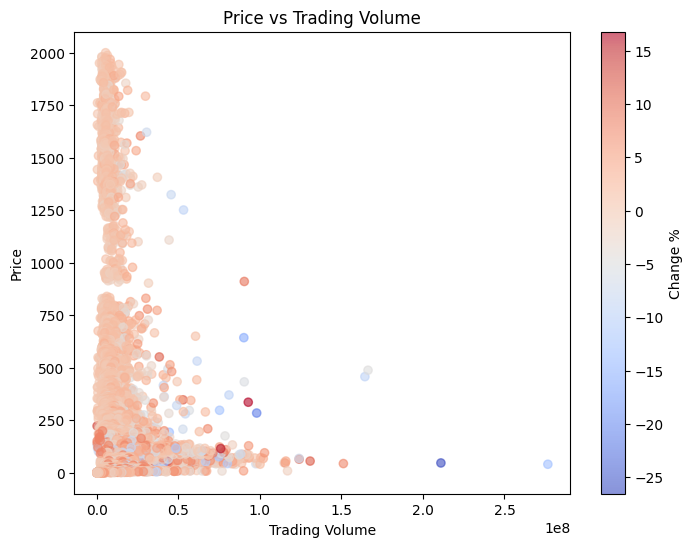

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Vol.'], data['Price'], alpha=0.6, c=data['Change %'], cmap='coolwarm')
plt.title('Price vs Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Price')
plt.colorbar(label='Change %')
plt.show()

Monthly Average Trends

Maximum Price: 1999.7 in 2024
Minimum Price: 0.76 in 1996
Maximum 20-Day Moving Average: 1928.905 in 2024
Minimum 20-Day Moving Average: 0.773 in 1996
Maximum 50-Day Moving Average: 1908.945 in 2024
Minimum 50-Day Moving Average: 0.8321999999999999 in 1995


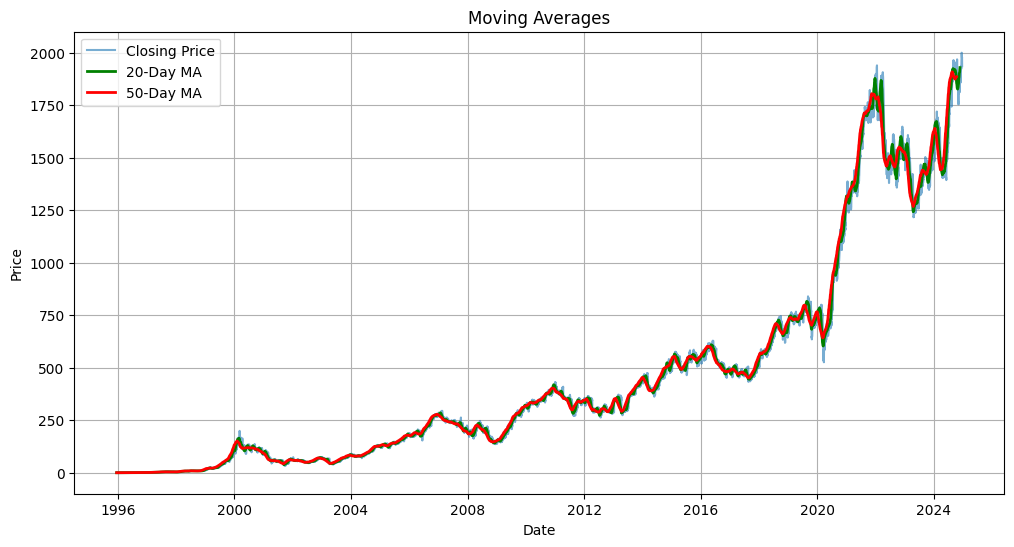

In [ ]:
# Convert the 'Date' column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Calculate the year for each date
data['Year'] = data['Date'].dt.year
# Calculate moving averages
data['MA_20'] = data['Price'].rolling(window=20).mean()
data['MA_50'] = data['Price'].rolling(window=50).mean()

# Finding the maximum and minimum prices and their corresponding years
max_price_row = data.loc[data['Price'].idxmax()]
min_price_row = data.loc[data['Price'].idxmin()]

max_price = max_price_row['Price']
min_price = min_price_row['Price']
max_price_year = max_price_row['Year']
min_price_year = min_price_row['Year']

# Finding the maximum and minimum 20-day moving averages and their corresponding years
max_ma_20_row = data.loc[data['MA_20'].idxmax()]
min_ma_20_row = data.loc[data['MA_20'].idxmin()]

max_ma_20 = max_ma_20_row['MA_20']
min_ma_20 = min_ma_20_row['MA_20']
max_ma_20_year = max_ma_20_row['Year']
min_ma_20_year = min_ma_20_row['Year']

# Finding the maximum and minimum 50-day moving averages and their corresponding years
max_ma_50_row = data.loc[data['MA_50'].idxmax()]
min_ma_50_row = data.loc[data['MA_50'].idxmin()]

max_ma_50 = max_ma_50_row['MA_50']
min_ma_50 = min_ma_50_row['MA_50']
max_ma_50_year = max_ma_50_row['Year']
min_ma_50_year = min_ma_50_row['Year']

# Print the results
print(f"Maximum Price: {max_price} in {max_price_year}")
print(f"Minimum Price: {min_price} in {min_price_year}")

print(f"Maximum 20-Day Moving Average: {max_ma_20} in {max_ma_20_year}")
print(f"Minimum 20-Day Moving Average: {min_ma_20} in {min_ma_20_year}")

print(f"Maximum 50-Day Moving Average: {max_ma_50} in {max_ma_50_year}")
print(f"Minimum 50-Day Moving Average: {min_ma_50} in {min_ma_50_year}")

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Closing Price', alpha=0.6)
plt.plot(data['Date'], data['MA_20'], label='20-Day MA', color='green', linewidth=2)
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', color='red', linewidth=2)
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Volume and Price Correlation Over Time

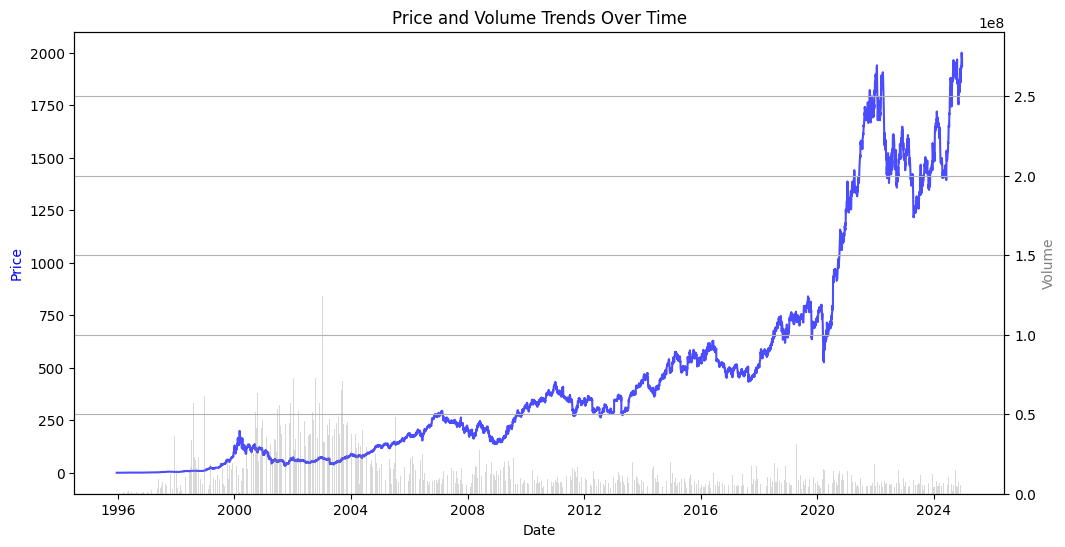

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price
ax1.plot(data['Date'], data['Price'], label='Price', color='blue', alpha=0.7)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='blue')

# Plot volume on secondary axis
ax2 = ax1.twinx()
ax2.bar(data['Date'], data['Vol.'], label='Volume', color='gray', alpha=0.3)
ax2.set_ylabel('Volume', color='gray')

# Add titles and grid
plt.title('Price and Volume Trends Over Time')
plt.grid(True)
plt.show()


Violin Plot for Price, High, and Low distributions by Month

Maximum Price reached at December
Minimum Price reached at January


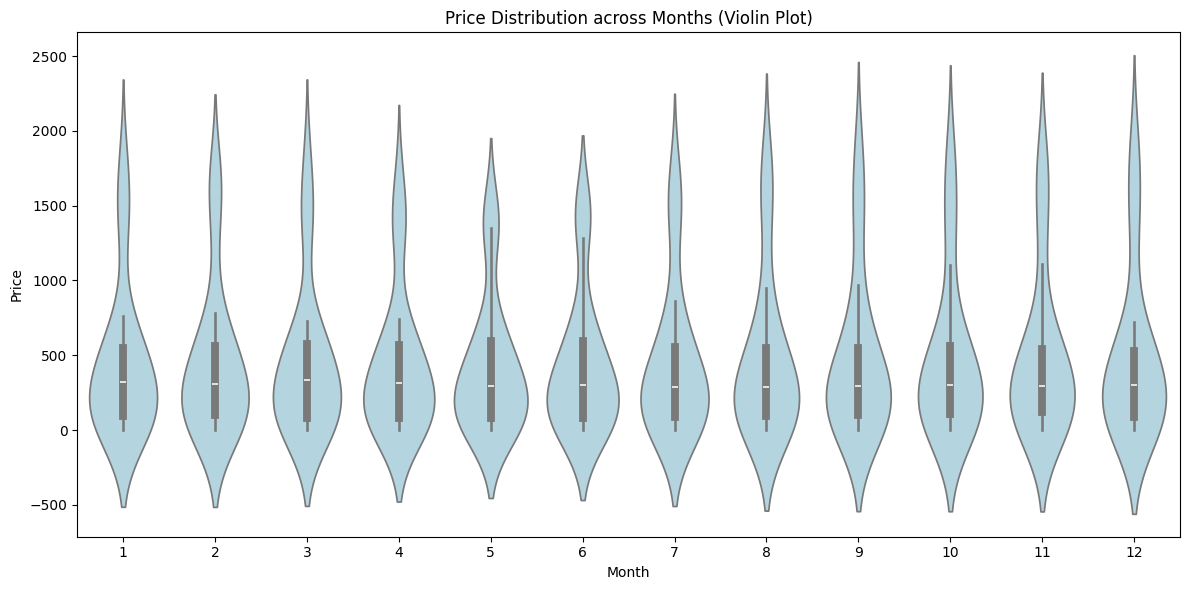

In [ ]:
monthly_data['Date'] = pd.to_datetime(monthly_data['Date'])

# Extract the month and corresponding month name
monthly_data['Month'] = monthly_data['Date'].dt.month
monthly_data['Month_Name'] = monthly_data['Date'].dt.month_name()

# Find the row with the maximum price and the row with the minimum price
max_price_row = monthly_data.loc[monthly_data['Price'].idxmax()]
min_price_row = monthly_data.loc[monthly_data['Price'].idxmin()]
max_price_month = max_price_row['Month_Name']
min_price_month = min_price_row['Month_Name']

# Print the results
print(f"Maximum Price reached at {max_price_month}")
print(f"Minimum Price reached at {min_price_month}")
plt.figure(figsize=(12, 6))
sns.violinplot(x=monthly_data['Date'].dt.month, y=monthly_data['Price'], color='lightblue')
plt.title('Price Distribution across Months (Violin Plot)')
plt.xlabel('Month')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

Volume Analysis

Minimum Volume: 1894400.0 in 1995-12
Maximum Volume: 1627520000.0 in 2003-04


Text(0, 0.5, 'Volume')

<Figure size 1200x600 with 0 Axes>

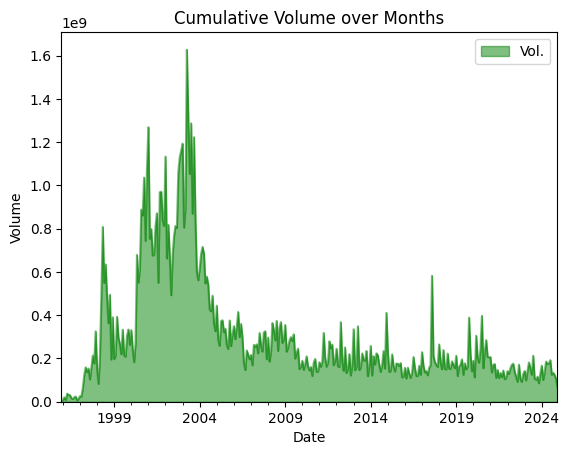

In [ ]:
# Extract year and month from the 'Date' column for easier access
monthly_data['Year'] = monthly_data['Date'].dt.year
monthly_data['Month'] = monthly_data['Date'].dt.month

# Find the row with the minimum volume
min_volume_row = monthly_data.loc[monthly_data['Vol.'].idxmin()]
min_volume = min_volume_row['Vol.']
min_year_month = f"{min_volume_row['Year']}-{min_volume_row['Month']:02d}"

# Find the row with the maximum volume
max_volume_row = monthly_data.loc[monthly_data['Vol.'].idxmax()]
max_volume = max_volume_row['Vol.']
max_year_month = f"{max_volume_row['Year']}-{max_volume_row['Month']:02d}"

# Output the results
print(f"Minimum Volume: {min_volume} in {min_year_month}")
print(f"Maximum Volume: {max_volume} in {max_year_month}")

plt.figure(figsize=(12, 6))
monthly_data.set_index('Date')[['Vol.']].plot(kind='area', color='green', alpha=0.5)
plt.title('Cumulative Volume over Months')
plt.xlabel('Date')
plt.ylabel('Volume')

Text(0, 0.5, 'Price')

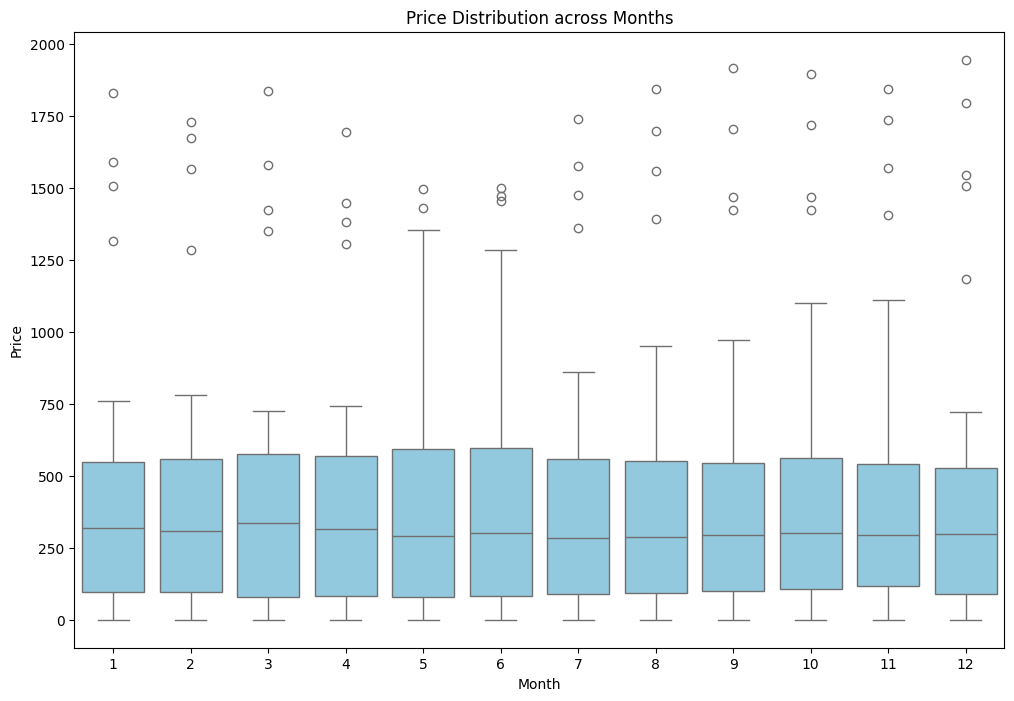

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=monthly_data['Date'].dt.month, y=monthly_data['Price'], color='skyblue')
plt.title('Price Distribution across Months')
plt.xlabel('Month')
plt.ylabel('Price')